## Data Cleaning

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [12]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [13]:
import re
import mailbox
import csv

In [14]:
billboard = pd.read_csv('./Data/billboard.csv',encoding='latin-1')

In [15]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
billboard.loc[billboard.track=="Maria, Maria",'genre'].values[0]

'Rock'

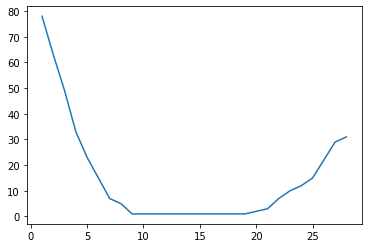

In [17]:
plt.plot(range(1,77),billboard.loc[0,'x1st.week':'x76th.week'])

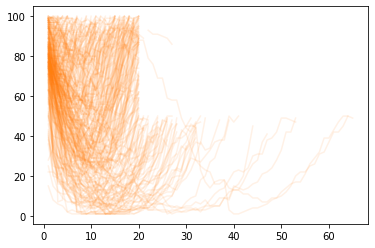

In [18]:
for index, row in billboard.iterrows():
    plt.plot(range(1,77),row['x1st.week':'x76th.week'],color='C1',alpha=0.1)

In [19]:
bshort = billboard[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]
bshort.columns = ['artist','track','time','date.entered','wk1','wk2','wk3']
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [20]:
bmelt = bshort.melt(['artist','track','time','date.entered'],['wk1','wk2','wk3'],'week','rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [21]:
bmelt.query('track =="Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [22]:
bmelt['week'] = bmelt['week'].apply(lambda x: int(x[2]))

In [23]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [24]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week']-1)

In [25]:
bmelt.drop(['date.entered'],1,inplace=True)

In [26]:
bfinal = bmelt[['artist','track','time','date','week','rank']]
bfinal.sort_values(['artist','track'],inplace=True)

In [27]:
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [28]:
tracks = bfinal[['artist','track','time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [29]:
tracks.index.name = 'id'
trackid = tracks.reset_index()
trackid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [30]:
tidy = pd.merge(trackid, bfinal, on=['track','artist','time']).drop(['artist','track','time'], axis=1)

In [31]:
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [32]:
tidy[tidy.week == 1]['rank'].idxmin()

756

## 2

In [38]:
tb = pd.read_csv('./Data/tb.csv')
final = pd.read_csv('./Data/final.csv')

In [39]:
tb.head()

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
final.head()

,country,year,age,sex,cases
0,AD,2005,0-4,m,0.0
1,AD,2006,0-4,m,0.0
2,AD,2008,0-4,m,0.0
3,AE,2006,0-4,m,0.0
4,AE,2007,0-4,m,0.0


In [41]:
tb.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [42]:
melted = tb.melt(['country','year'],['m04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],'sexage','cases')

In [43]:
melted.head()

,country,year,sexage,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [44]:
melted['sex'] = melted['sexage'].str.slice(0,1)
melted['age'] = melted['sexage'].str.slice(1)

In [45]:
melted.head()

,country,year,sexage,cases,sex,age
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04


In [46]:
melted['age'] = melted['age'].map({'04':'0-4','514':'5-14','1524':'15-24','2534':'25-34','3544':'35-44','4554':'45-54','5564':'55-64','65':'65+','u':np.nan})

In [47]:
melted.head()

,country,year,sexage,cases,sex,age
0,AD,1989,m04,NaN,m,0-4
1,AD,1990,m04,NaN,m,0-4
2,AD,1991,m04,NaN,m,0-4
3,AD,1992,m04,NaN,m,0-4
4,AD,1993,m04,NaN,m,0-4


In [48]:
final = melted.dropna(subset=['cases'])

In [49]:
final.head()

,country,year,sexage,cases,sex,age
15,AD,2005,m04,0.0,m,0-4
16,AD,2006,m04,0.0,m,0-4
18,AD,2008,m04,0.0,m,0-4
42,AE,2006,m04,0.0,m,0-4
43,AE,2007,m04,0.0,m,0-4


In [50]:
final.sort_values(['country','year','age','sex'])
final.head()

,country,year,sexage,cases,sex,age
15,AD,2005,m04,0.0,m,0-4
16,AD,2006,m04,0.0,m,0-4
18,AD,2008,m04,0.0,m,0-4
42,AE,2006,m04,0.0,m,0-4
43,AE,2007,m04,0.0,m,0-4


In [51]:
final = final[['country','year','age','sex','cases']]
final.head()

,country,year,age,sex,cases
15,AD,2005,0-4,m,0.0
16,AD,2006,0-4,m,0.0
18,AD,2008,0-4,m,0.0
42,AE,2006,0-4,m,0.0
43,AE,2007,0-4,m,0.0


In [52]:
"""
Statistics is the science of learning from data
"""

'\nStatistics is the science of learning from data\n'

## visualization

In [53]:
import scipy.stats

In [54]:
from IPython import display
from ipywidgets import interact, widgets

In [55]:
import re , mailbox , csv

In [60]:
gapminder = pd.read_csv('./Data/gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


<AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>

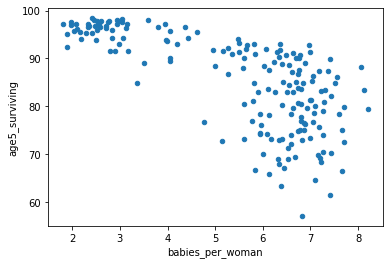

In [61]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [62]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({
        'Africa': 'skyblue',
        'Europe': 'gold',
        'America': 'palegreen',
        'Asia': 'coral'
    })
    data.plot.scatter('babies_per_woman',
                      'age5_surviving',
                      s=area,
                      c=colors,
                      linewidths=1,
                      edgecolors='k',
                      figsize=(12, 9))
    
    plt.axis(ymin=50, ymax=105, xmin=0, xmax=8)
    plt.xlabel('babies per woman')
    plt.ylabel('% children alive at 5')

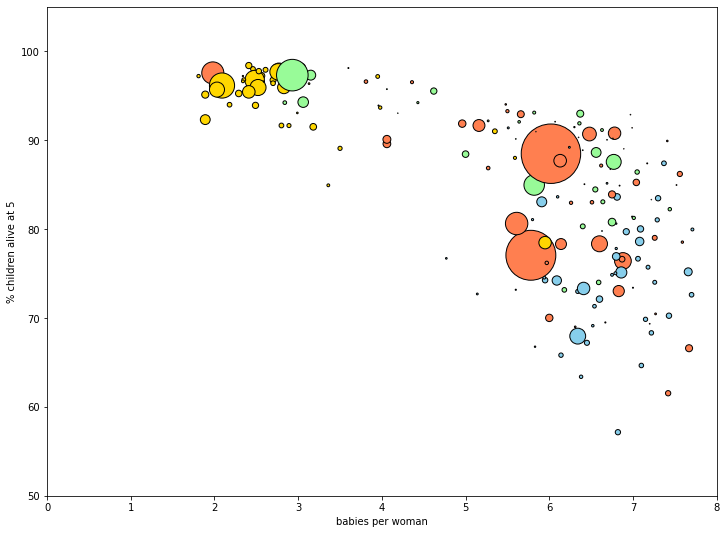

<function __main__.plotyear(year)>

In [63]:
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1965))

### Distributions

In [65]:
china1965 = pd.read_csv('./Data/income-1965-china.csv')
china2015 = pd.read_csv('./Data/income-2015-china.csv')
usa1965 = pd.read_csv('./Data/income-1965-usa.csv')
usa2015 = pd.read_csv('./Data/income-2015-usa.csv')

In [66]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [67]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [68]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [69]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [70]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [71]:
china1965.quantile(0.5)

income          0.557477
log10_income   -0.253773
Name: 0.5, dtype: float64

In [72]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [73]:
scipy.stats.percentileofscore(china1965.income, 1.5)

95.5

In [74]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [75]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


### Histograms

<AxesSubplot:>

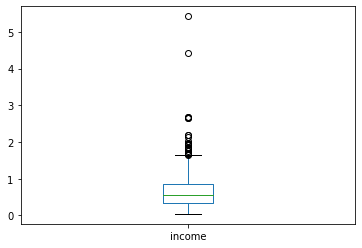

In [76]:
china1965.income.plot(kind='box')

<AxesSubplot:>

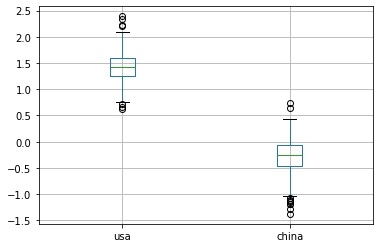

In [77]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

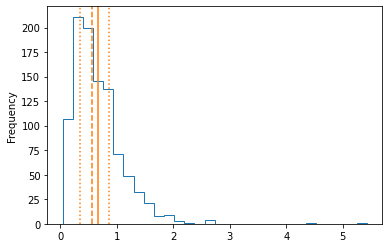

In [78]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

pp.axvline(china1965.income.mean(),c='C1')
pp.axvline(china1965.income.median(),c='C1',linestyle='--')
pp.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

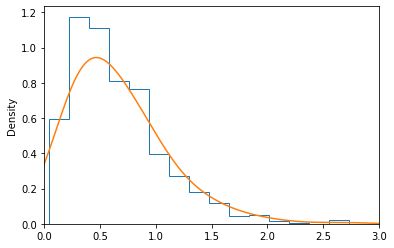

In [79]:
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.5)

pp.axis(xmin=0,xmax=3)

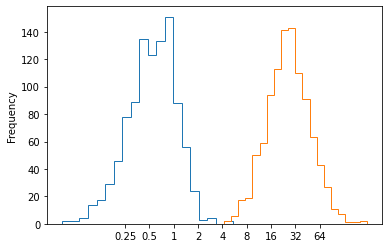

In [80]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

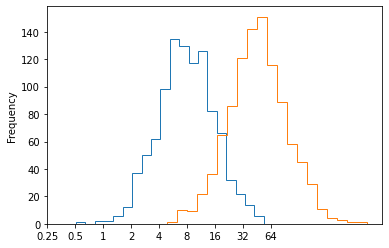

In [81]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [82]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [83]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

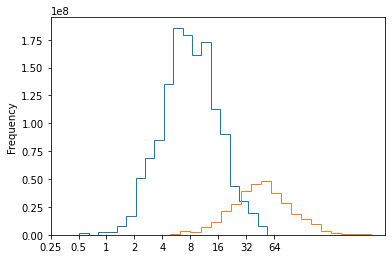

In [84]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

### Two variable analysis

In [85]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [86]:
italy = gapminder.query('country == "Italy"')
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


<AxesSubplot:xlabel='year', ylabel='population'>

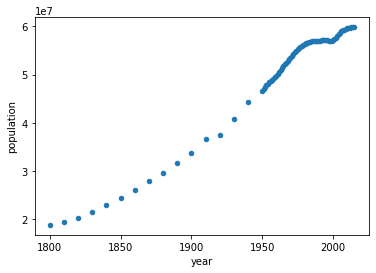

In [87]:
italy.plot.scatter("year", "population")

<AxesSubplot:xlabel='year', ylabel='population'>

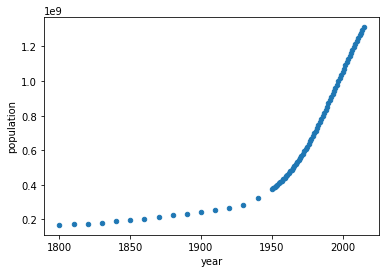

In [88]:
gapminder.query('country == "India"').plot.scatter("year","population")

<AxesSubplot:xlabel='year', ylabel='gdp_per_day'>

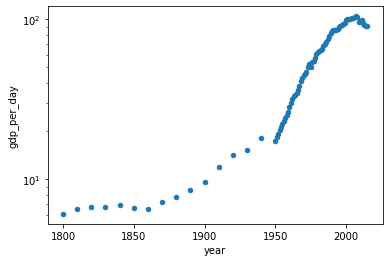

In [89]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

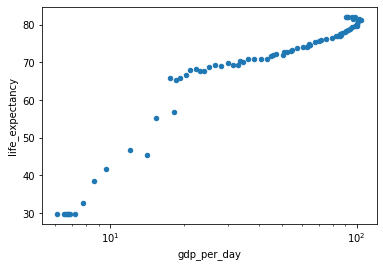

In [90]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

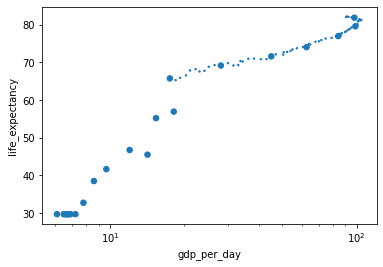

In [91]:
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

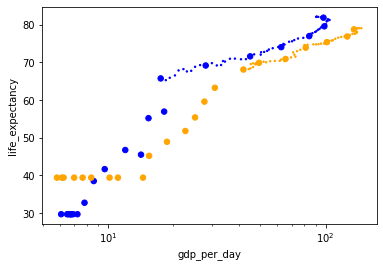

In [92]:
data = gapminder.query('(country == "Italy") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

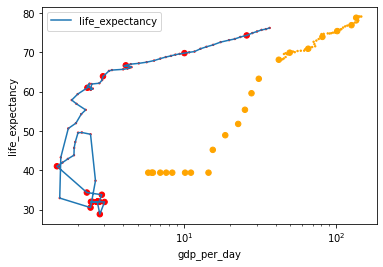

In [93]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')

ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)

### More variables

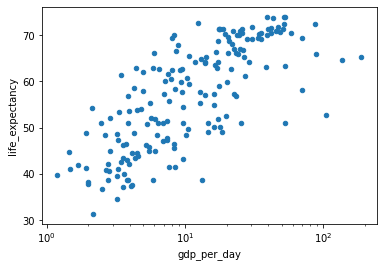

In [94]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

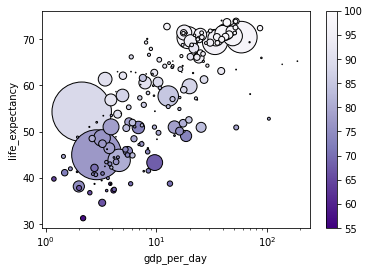

In [95]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', sharex=False)

plotyear(1965)

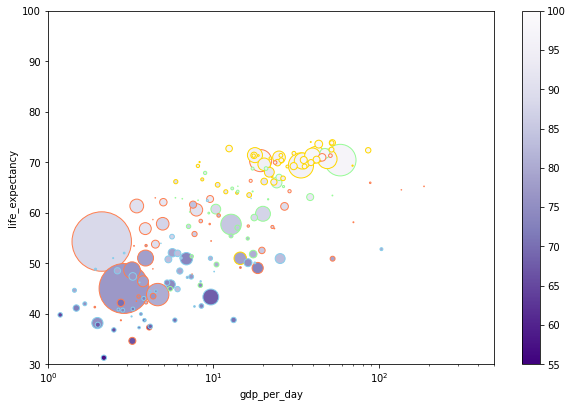

In [96]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

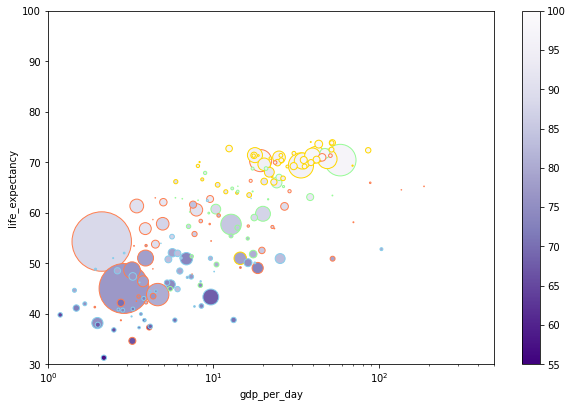

<function __main__.plotyear(year)>

In [97]:
interact(plotyear,year=range(1965,2016,10))

In [98]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

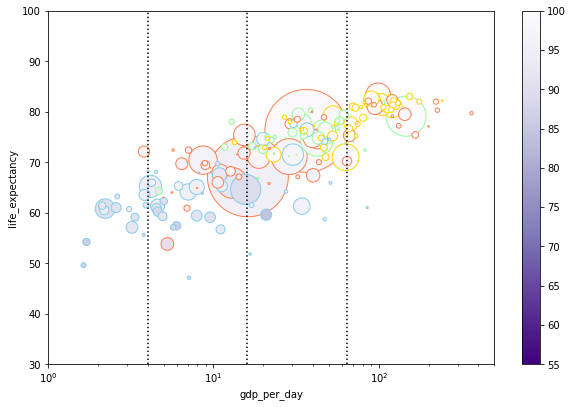

In [99]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

array([[<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='log10_gdp_per_day'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='babies_per_woman'>,
        <AxesSubplot:x

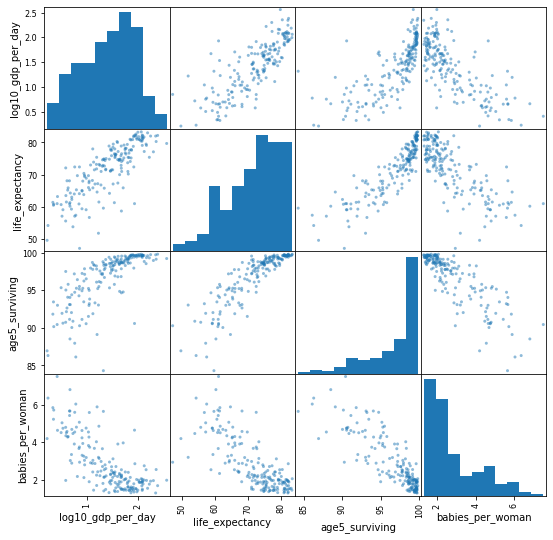

In [100]:
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]

import pandas
pandas.plotting.scatter_matrix(data,figsize=(9,9))

## Handling categorical data

In [103]:
smoking = pd.read_csv('./Data/whickham.csv')
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [104]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [105]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [106]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True))

,outcome
Alive,0.719178
Dead,0.280822


In [107]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [108]:
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [109]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [110]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [111]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): ['0-30' < '30-40' < '40-53' < '53-64']

In [112]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [113]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [114]:
byage.unstack().drop("Dead",axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [115]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [116]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [117]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

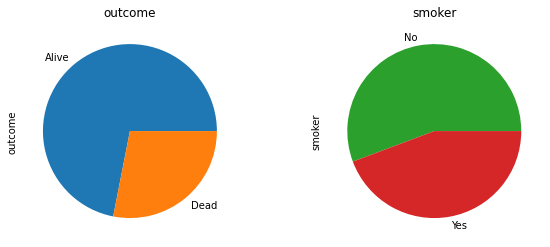

In [118]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3']); pp.title('smoker')

In [119]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

<AxesSubplot:xlabel='smoker,outcome'>

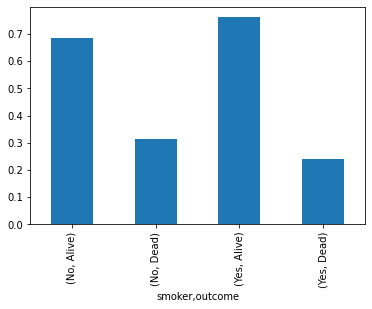

In [120]:
bysmoker.plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

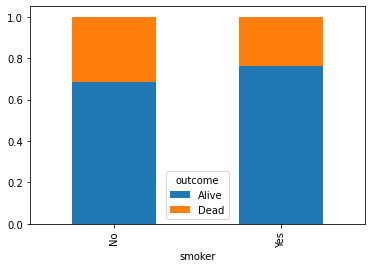

In [121]:
bysmoker.unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='ageGroup,smoker'>

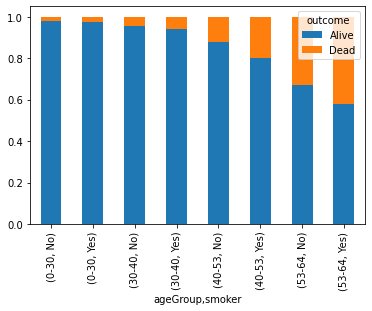

In [122]:
byage.unstack().plot(kind='bar',stacked=True)

In [123]:
byage.unstack().drop("Dead",axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [124]:
byage2 = byage.unstack().drop("Dead",axis=1).unstack()

byage2.columns = ["No","Yes"]
byage2.columns.name = "smoker"

In [125]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


<AxesSubplot:xlabel='ageGroup'>

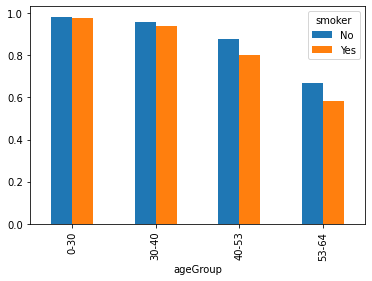

In [126]:
byage2.plot(kind='bar')

## Mailbox analysis

In [127]:
messages = pd.read_csv('./Data/mbox-anonymized.csv')


In [128]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [129]:
messages.keys()

Index(['subject', 'from', 'to', 'date'], dtype='object')

In [130]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [131]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [132]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [133]:
messages['from'] = messages['from'].dropna().apply(clean_address)

In [134]:
messages['to'] = messages['to'].dropna().apply(clean_address)

In [135]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [136]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [137]:
pd.to_datetime(messages['date'][0]).tz_convert('utc').tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [138]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('UTC').tz_convert('America/Los_Angeles'))

In [139]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [140]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.day_name(),
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [141]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [142]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 

<AxesSubplot:xlabel='nyear', ylabel='timeofday'>

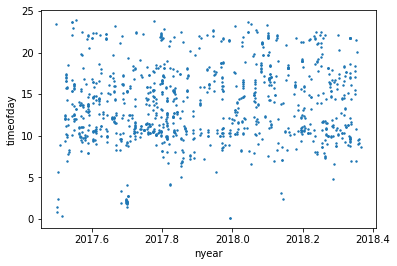

In [143]:
messages.plot.scatter('nyear','timeofday',s=2)

<AxesSubplot:>

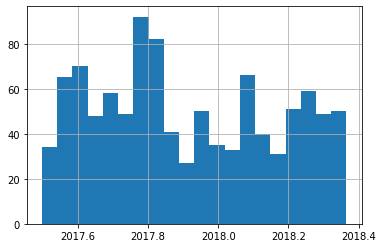

In [144]:
messages.nyear.hist(bins=20)

<AxesSubplot:>

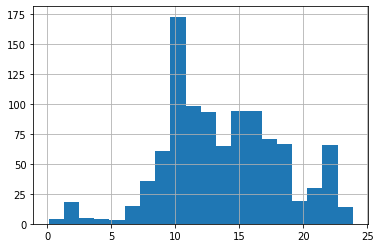

In [145]:
messages.timeofday.hist(bins=20)

In [146]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

<AxesSubplot:>

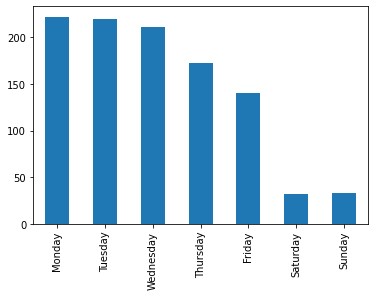

In [147]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [148]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [149]:
days = messages.dayofweek.cat.categories

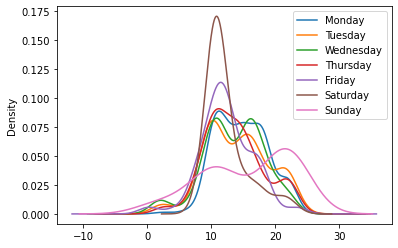

In [150]:
for day in days:
    messages[messages.dayofweek == day].timeofday.plot(kind='density')
    
plt.legend(days)

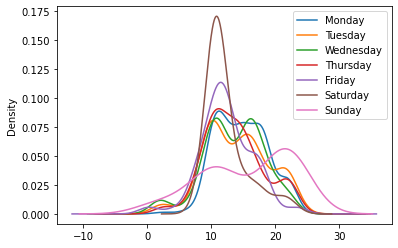

In [151]:
messages.groupby('dayofweek').timeofday.plot(kind='density')
plt.legend(days)

## Confidence Interval

In [155]:
poll = pd.read_csv('./Data/poll.csv')
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [156]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [157]:
poll.vote.value_counts()

Brown    511
Green    489
Name: vote, dtype: int64

In [158]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [159]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [160]:
s = sample(0.51,n=1000)

In [161]:
s.vote.value_counts(normalize=True)

Brown    0.516
Green    0.484
Name: vote, dtype: float64

In [162]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [163]:
dist.head()

,Green,Brown
vote,0.510,0.490
vote,0.478,0.522
vote,0.513,0.487
vote,0.480,0.520
vote,0.512,0.488


<AxesSubplot:>

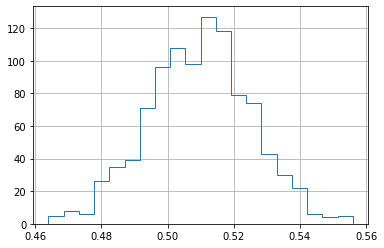

In [164]:
dist.Brown.hist(histtype='step',bins=20)

In [165]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [166]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [167]:
quantiles(0.50)

(0.469, 0.532)

In [168]:
quantiles(0.48)

(0.451, 0.509025)

In [169]:
quantiles(0.54)

(0.5079750000000001, 0.5690249999999999)

In [170]:
dist = samplingdist(0.50,10000)

<AxesSubplot:>

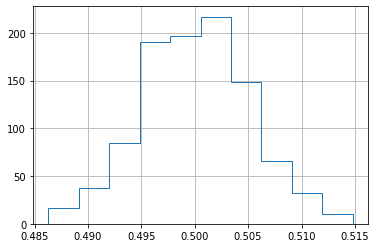

In [171]:
dist.Brown.hist(histtype='step')

In [173]:
largepoll = pd.read_csv('./Data/poll-larger.csv')

## Bootstrapping

In [174]:
pop = pd.read_csv('./Data/grades.csv')
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

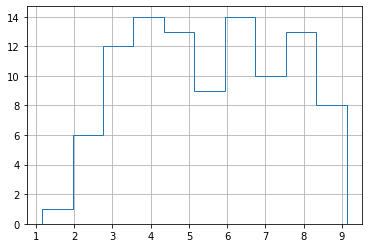

In [175]:
pop.grade.hist(histtype='step')

In [176]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [177]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.220724
std,1.995276
min,1.160899
25%,3.536306
50%,4.986192
75%,6.878701
max,9.120705


In [178]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

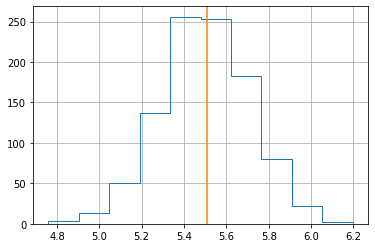

In [179]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [180]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.086647692643958, 5.898609357485542)

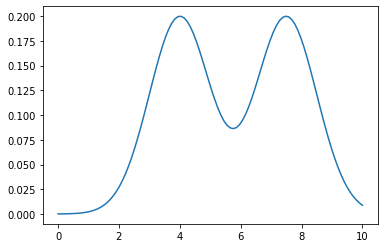

In [181]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [182]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [183]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

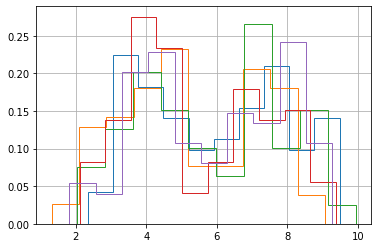

In [184]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [185]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

<AxesSubplot:>

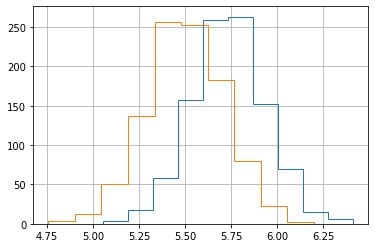

In [186]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

## Hypothesis Testing

In [188]:
pumps = pd.read_csv('./Data/pumps.csv')
pumps.head()

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611


In [190]:
cholera = pd.read_csv('./Data/cholera.csv')
cholera.head()

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
1,2,51.513361,-0.137883,-0.084050,0.002223,0
2,1,51.513317,-0.137853,-0.081975,-0.002668,0
3,1,51.513262,-0.137812,-0.079138,-0.008781,0
4,4,51.513204,-0.137767,-0.076025,-0.015229,0


In [191]:
cholera.loc[::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


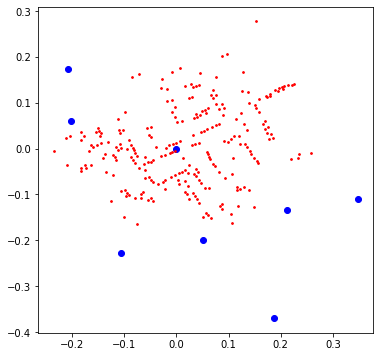

In [192]:
plt.figure(figsize=(6,6))
plt.scatter(pumps.x,pumps.y,color='b')
plt.scatter(cholera.x,cholera.y,color='r',s=3)

In [195]:
img = matplotlib.image.imread('./Data/london.png')

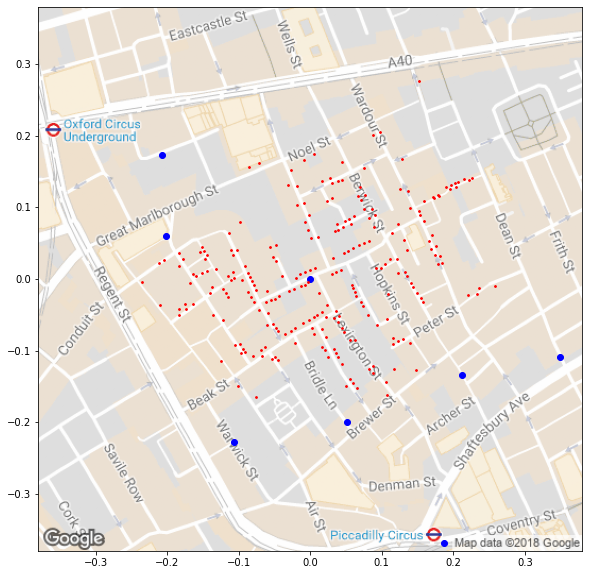

In [196]:
plt.figure(figsize=(10,10))

plt.imshow(img,extent=[-0.38,0.38,-0.38,0.38])

plt.scatter(pumps.x,pumps.y,color='b')
plt.scatter(cholera.x,cholera.y,color='r',s=3)

In [197]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [198]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [199]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5],size=n,p=[0.65,0.15,0.10,0.10])})

In [200]:
simulate(489).closest.value_counts()

0    329
1     81
5     44
4     35
Name: closest, dtype: int64

In [201]:
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(10000)]})

<AxesSubplot:>

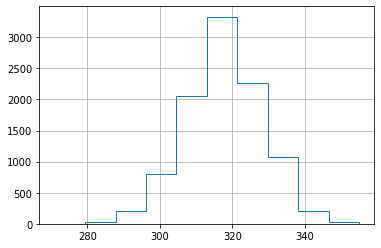

In [202]:
sampling.counts.hist(histtype='step')

In [203]:
100 - scipy.stats.percentileofscore(sampling.counts,340)

1.7450000000000045

## P-value and Confidence Interval

In [204]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [205]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [206]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<AxesSubplot:>

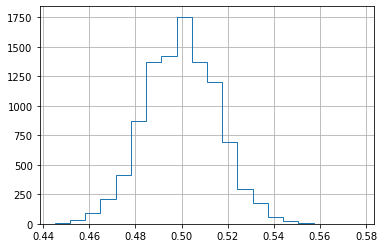

In [207]:
dist.Brown.hist(histtype='step',bins=20)

In [208]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

23.545

In [210]:
largepoll = pd.read_csv('./Data/poll-larger.csv')

In [211]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [212]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

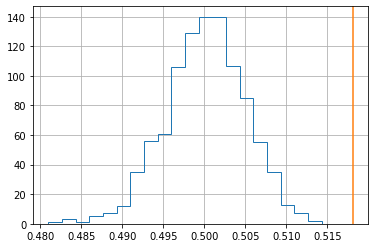

In [213]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

## Bayesian Inference

In [216]:
import pymc3 as pm

In [217]:
n = 100
k = 61


with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    y = pm.Binomial('y',n=n,p=p,observed=k)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 22 seconds.


In [218]:
pm.summary(trace)

/Users/subir/Environment/python/base/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.7,0.001,0.0,8989.0,8989.0,9000.0,13159.0,1.0


/Users/subir/Environment/python/base/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

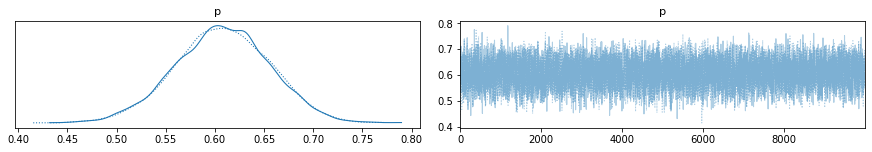

In [219]:
pm.traceplot(trace)

In [220]:
gdata = gapminder[gapminder.year==1985]
gdata.sort_values('age5_surviving')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day,log10_gdp_per_day
9768,Niger,1985,Africa,6838170.0,44.63,66.71,7.78,997.0,2.729637,0.436105
8391,Mali,1985,Africa,7831891.0,46.68,71.50,7.09,1001.0,2.740589,0.437844
11712,Sierra Leone,1985,Africa,3466044.0,53.14,72.72,6.89,1415.0,3.874059,0.588166
5394,Guinea,1985,Africa,5078689.0,47.33,73.69,6.64,1085.0,2.970568,0.472840
9201,Mozambique,1985,Africa,13102982.0,50.02,74.59,6.40,379.0,1.037645,0.016049
...,...,...,...,...,...,...,...,...,...,...
12765,Switzerland,1985,Europe,6455680.0,76.99,99.10,1.54,42462.0,116.254620,2.065410
5880,Iceland,1985,Europe,241411.0,77.85,99.23,2.15,25997.0,71.175907,1.852333
12684,Sweden,1985,Europe,8350814.0,76.72,99.24,1.74,28202.0,77.212868,1.887690
6609,Japan,1985,Asia,119988663.0,77.80,99.25,1.72,23554.0,64.487337,1.809474


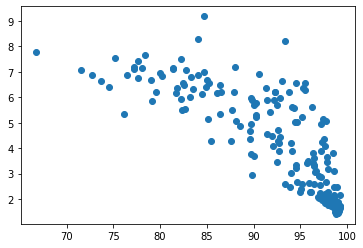

In [221]:
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [222]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])

    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [223]:
pm.summary(trace)

/Users/subir/Environment/python/base/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,10.189,0.284,9.673,10.729,0.005,0.003,3406.0,3406.0,3386.0,4296.0,1.0
slope,-0.219,0.010,-0.239,-0.200,0.000,0.000,3355.0,3355.0,3337.0,4111.0,1.0


/Users/subir/Environment/python/base/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

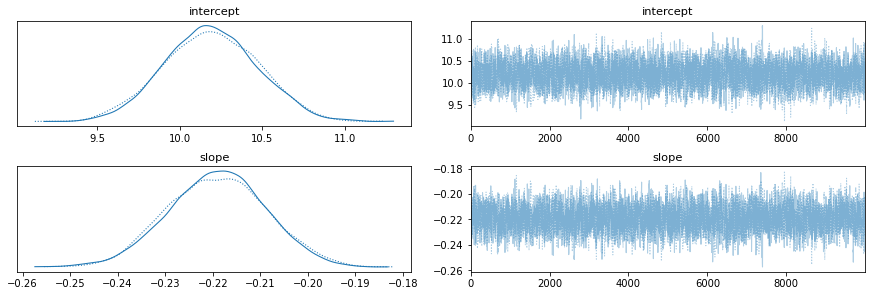

In [224]:
pm.traceplot(trace)

In [225]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

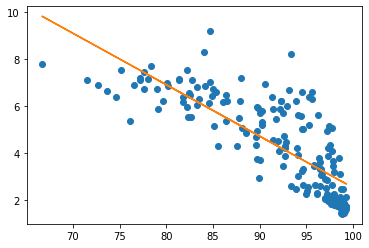

In [226]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

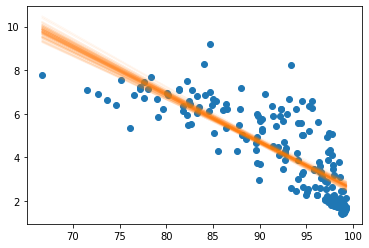

In [227]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)